# 1 Mid-Term Assignment

# 2 Bibliography

[1] Alfaouri, M., & Daqrouq, K. (2008). ECG signal denoising by wavelet transform thresholding. American Journal of applied sciences, 5(3), 276-281.

[2] Dupre, A., Vincent, S., & Iaizzo, P. A. (2005). Basic ECG theory, recordings, and interpretation. In Handbook of cardiac anatomy, physiology, and devices (pp. 191-201). Humana Press.

[3] Parák, J., & Havlík, J. (2011). ECG signal processing and heart rate frequency detection methods. Proceedings of Technical Computing Prague, 8, 2011.

[4] BHARTI SALSEKAR & DR. A. K. WADHWANI. FILTERING OF ECG SIGNAL USING BUTTERWORTH FILTER AND ITS FEATURE EXTRACTION. International Journal of Engineering Science and Technology (04 April 2012)   

# 3 Introduction

## ECG and ECG Signals

Electrocardiogram (ECG) is a classic example of biomedical engineering research which employs digital signal processing [3]. It records the changes in the electrical activity of the heart in each cardiac cycle using electrodes. These electrodes are placed on the skin and they record changes in electrical activity of the heart caused by potential actions.Dupre, Vincent & Iaizzo (2005) describes in detail the theory, recordings and interpretation of ECG. According to them, human body acts as a large volume conductor in case of an ECG and the electrical field around the heart is detected using the electrodes placed on the skin. These electrodes detect the voltage of electrical field and provide electrocardiogram [2].

The electrodes measure ECG signals and these signals are then transformed to simple electrical circuits with amplifiers and analogue-digital converters [3]. These signals possess vital information and is used for the analysis of the whole cardiac muscle [1].

ECGs are important biomedical signals, which are reflective of an electric activity of the heart. They form a subject of intensive research for over 100 years. ECG signals are one of the best-understood signals being at the same time an important source of diagnostic information. Because of this, in the recent years there has been a steady and intensive research with intent of developing efficient and effective methods of processing and analysis of ECG signals with emphasis on the discovery of essential and novel diagnostic information.


# 4 Opening ECG signal from file aami3a.dat 


 The length of the file is: 43081 as expected from 43081 samples x 1 lines

 The length of the time array is: 43081


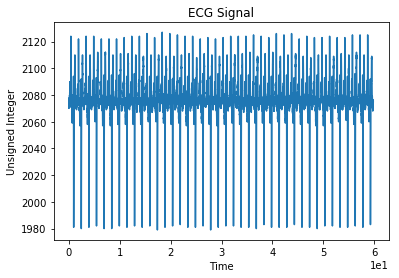

In [62]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as ab
from scipy import signal
import pylab as pl
import matplotlib.pyplot as xy

op = open('aami3a.dat','rb')
#we read it using a numpy (therefore the ab.) command that allows direct reading from file into an array
AllSignal = ab.fromfile(op,count=-1,dtype=ab.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 43081 samples x 1 lines')
#we will now populate an array for the time which we now is 1/750 step for a total of 43081 samples
n=ab.arange(0,43081/720.,1/720.)  #start,stop,step
print('\n The length of the time array is: ' + str(len(n)) )
xy.subplot(111)
xy.plot(n,AllSignal[:43081])
xy.title('ECG Signal')
xy.xlabel('Time')
xy.ylabel('Unsigned Integer')
xy.ticklabel_format( axis='x', scilimits=(0,0))
op.close()

# 5 Number of samples used to plot 5 beats in the signal

Assuming average heart rate between 60 and 100 beats per minute.

For 80 beats per minute,

1 minutes = 60 seconds,

1 beat = 1.33 seconds,

For 5 beats,

Total timeline= 5*1.33 = 6.65 seconds 

Number of samples = 720*6.65 = 4788
samples


# 6 Plotting a zoom in for signal which has 5 cardiac cycle

Considering this person has a cardiac cycle of 60 beats/minute 

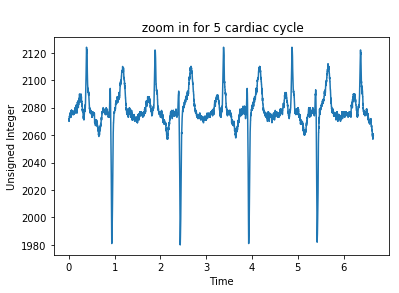

In [63]:
n=ab.arange(0,43081/720.,1/720.)
index=ab.where(n>6.65)
index=index[0]
xy.subplot(111)
xy.plot(n[:index[0]],AllSignal[:index[0]])
xy.title('\n zoom in for 5 cardiac cycle')
xy.xlabel('Time')
xy.ylabel('Unsigned Integer')
xy.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


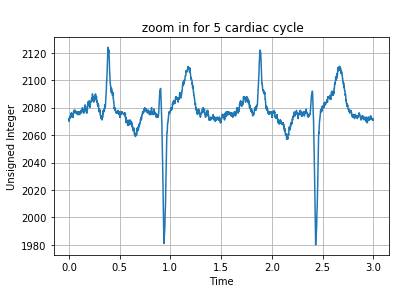

In [64]:
index=ab.where(n>3)
index=index[0]
xy.subplot(111)
xy.plot(n[:index[0]],AllSignal[:index[0]])
xy.title('\n zoom in for 5 cardiac cycle')
xy.xlabel('Time')
xy.ylabel('Unsigned Integer')
xy.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
xy.grid()

# 7 Considering Provided typical ECG Signal was heart rate lower or higher ?

The heart rate was lower for this individual as PR time provided is lower than QT time in this typical ECG Signal

# 8 Estimating heart rate of this individual in beats/minute

To calculate heart rate,consider the interval between two identical points of consecutive ECG waveforms such as the R-R interval.

Heart Rate = 60/R-R interval [2]

Another way to obtain an estimate rate,

By RR or PP interval. Assuming 1 big box than the rate is 60/0.5 = 120 beats/minute. 

Order is given below :-

time interval between two peaks is 1.5 seconds ,one block is equal to 0.5 seconds

block 1: (60/0.5) = 120

block 2: (60/1.0) = 60

block 3: (60/1.5) = 40

block 4: (60/2.0) = 30

block 5: (60/2.5) = 24

Here, RR peaks are obtained at every 3 blocks, hence the estimate heart rate of this individual is around 40 beats/minute.

# 9 Obtaining DFT of the Signal and Plotting the full spectrum

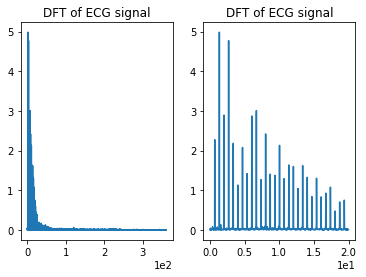

In [65]:
line=AllSignal[:43080]
#we first eliminate dc
data=line-ab.mean(line)
L=len(data)
freq=ab.arange(0,720/2.,720/43080.)
Y=ab.fft.fft(data)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
xy.subplot(121)
xy.plot(freq, Pyy[:21540])
xy.title('DFT of ECG signal')
xy.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=ab.where(freq>20)
inx=inx[0]
xy.subplot(122)
xy.plot(freq[:inx[0]], Pyy[:inx[0]])
xy.title('DFT of ECG signal')
xy.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# 10 Obtaining the frequency at which maximum is observed

The  frequency at which maximum is observed: 4.98149090804 Hz


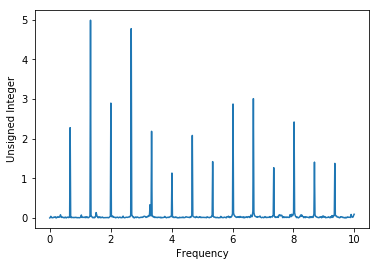

In [66]:
a=ab.where(freq>10)
a=a[0]
xy.xlabel('Frequency')
xy.ylabel('Unsigned Integer')
xy.plot(freq[0:a[0]], Pyy[0:a[0]]) 
b=ab.amax(Pyy)
print('The  frequency at which maximum is observed: ' + str(b)+' Hz')
# frequenct at which maximum is 4.98 Hz  

# 11 Calculating the heart rate in beats/minute from the spectrum

In [67]:
c=0
k=0
x=0
#
for k in range (0,80):
    if (Pyy[x]) > b:
        x=k
        
    c=((720)/43081)*k
    # 1.32 Hz is my RR interval
    
heartrate = 60/1.32030361412

print('Heart rate from spectrum is: '+ str(heartrate) + 'beats/minute')

Heart rate from spectrum is: 45.4440928271beats/minute


# 12 Explanation of peaks observed in spectrum and how frequency peaks are obtained from the heart rate

By calculating fourier transform of the signal and by the discrete fourier transform we get the frequency at which maximum is observed as 4.98149090804 Hz and the highest peaks are obtained at 3 hz, so we can consider rest of signals as noise.

From the output graph we see the first peak is seen at 1.32030361412 Hz, Hence Heart rate = 60/1.32030361412 = 45 beats/minute

# 13 Explanation on applying filter on this signal

Low pass filter is used to eliminate any frequency higher then the cut off frequency. This type of filter only accepts a signal having frequency lowe rthen the cut off frequency. We are applying this filter on given signal to eliminate the noise and obtain the graph with cardiac cycles for calculating the hear rate in beats/minute.


# 14 Filtering the signal using a digital low-pass Butterworth filter that cut frequencies above 100 Hz

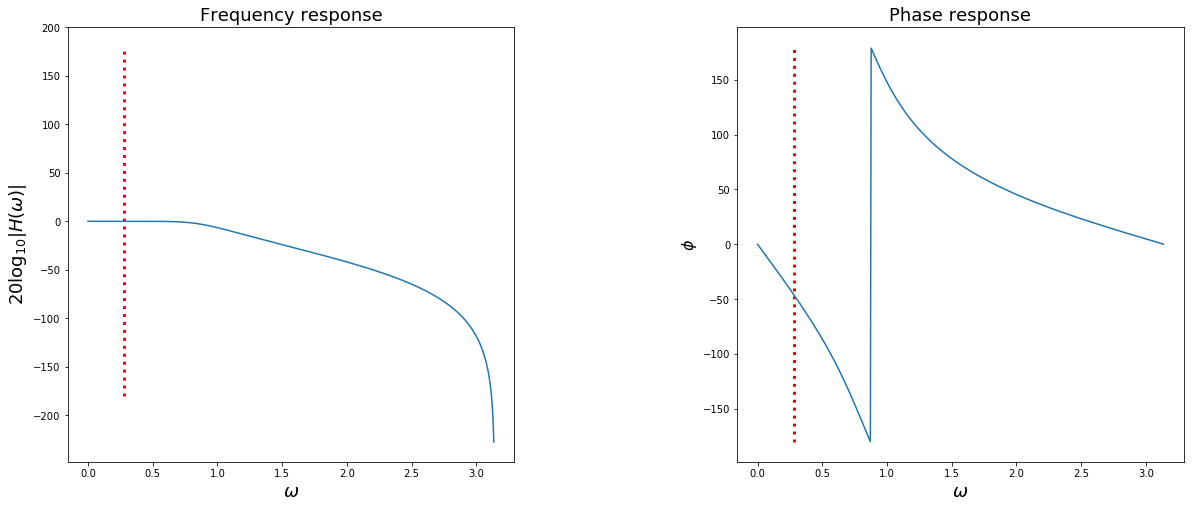

In [ ]:
from __future__ import division
from matplotlib import gridspec
from scipy import signal
diag=xy.figure()
diag.set_size_inches((20,20))

ht = gridspec.GridSpec(2,2)
ht.update( wspace=0.5, hspace=0.5)

sfreq=720 # Sampling Frequency
nfreq=sfreq/2 # Nyquist Freqency
cutfreq= 100 # Cut-Off Frequency
nc=100/nfreq
b,a=signal.butter(4,nc,btype='lowpass',analog= False)
w,h=signal.freqz(b,a)
sig=signal.lfilter(b,a,data) # putput siganl with filter

x=ab.arange(0,43080/720.,1/720.)
yz = diag.add_subplot(xy.subplot(ht[0,0]))
yz.set_title('Frequency response',fontsize=18)
yz.plot(w, 20 * ab.log10(abs(h))) 
yz.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
yz.set_xlabel(r'$\omega$',fontsize=18)
yz.vlines(nc,-180,180,linestyles=':',color='r',lw=3.)

yz = diag.add_subplot(xy.subplot(ht[0,1]))
xy.plot(w,ab.angle(h)/ab.pi*180)
yz.set_title('Phase response',fontsize=18)
yz.set_xlabel(r'$\omega$',fontsize=18)
yz.set_ylabel(r"$\phi $",fontsize=16)
yz.vlines(nc,-180,180,linestyles=':',color='r',lw=3.)

# 15 Plotting the frequency response of the filter

In [ ]:
from matplotlib import gridspec
from scipy import signal
diag=xy.figure()
diag.set_size_inches((20,20))

ht = gridspec.GridSpec(2,2)
ht.update( wspace=0.5, hspace=0.5)
yz = diag.add_subplot(xy.subplot(ht[0,0]))
yz.plot(x,sig)
yz.set_xlim(xmax = 6.65, xmin =0)
yz.set_title('Filtered output for 5 cardiac cycles',fontsize=18)
yz.set_ylabel("amplitude",fontsize=18)
yz.set_xlabel('Time (s)',fontsize=16)

# 16 Obtaining DFT of the filtered signal and plotting the full spectrum after filtering

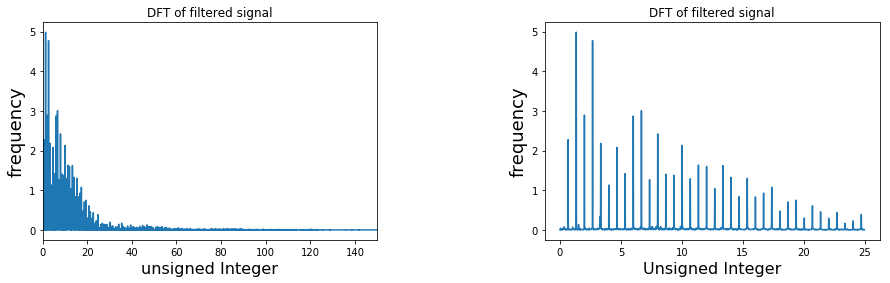

In [70]:
from matplotlib import gridspec
diag=xy.figure()
diag.set_size_inches((15,10))
ht = gridspec.GridSpec(2,2)
ht.update( wspace=0.5, hspace=0.5)
yz = diag.add_subplot(xy.subplot(ht[0,0]))
LL=len(s)
ff=ab.arange(0,720,720/43080.)
YY=ab.fft.fft(s)
Pyy=abs(YY)/LL
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
yz = diag.add_subplot(xy.subplot(ht[0,0]))
yz.plot(ff, Pyy[:43080])
yz.set_title('DFT of filtered signal')
yz.set_ylabel("Frequency",fontsize=18)
yz.set_xlabel('Unsigned Integer',fontsize=16)
yz.set_xlim(xmax = 150, xmin =0)
index=ab.where(ff>25)
index=index[0]
yz = diag.add_subplot(xy.subplot(ht[0,1]))
yz.plot(ff[:index[0]], Pyy[:index[0]])
yz.set_title('DFT of filtered signal')
yz.set_ylabel("Frequency",fontsize=18)
yz.set_xlabel('Unsigned Integer',fontsize=16)


# 17 Effects of Filter 

Filtering of any signal is done to remove any type of noise or distortion present in the signal. Here we are using Butterworth low pass filter to remove the noise [4]. Here the cut off frequency used for our filter is 100 Hz. Though amplitude of our signal reduces it is not affecting sampling frequency. 